# Advanced mesh format benchmark
Comparing 'normal' mesh format and 'advanced' mesh format for 3D DC inversion.

In [3]:
import sys, os 
sys.path.append('../src')

from resipy import Project
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import time

datadir = '../src/examples/dc-3d/'

In [4]:
# create different project object
ks = []
nelems = []
for i in range(5):
    k = Project('/home/jkl/Downloads/tt/', typ='R3t')
    k.createSurvey(datadir + 'protocol.dat', ftype='ProtocolDC')
    k.importElec(datadir + 'elec.csv')
    k.createMesh(cl=(i+1)/4*2, show_output=False) # could use refine as well
    nelems.append(k.mesh.df.shape[0])
    ks.append(k)

Working directory is: /home/jkl/Downloads/tt
clearing dirname
0/644 reciprocal measurements found.
Creating tetrahedral mesh...done (196522 elements)
Working directory is: /home/jkl/Downloads/tt
clearing dirname
0/644 reciprocal measurements found.
Creating tetrahedral mesh...done (30091 elements)
Working directory is: /home/jkl/Downloads/tt
clearing dirname
0/644 reciprocal measurements found.
Creating tetrahedral mesh...done (11321 elements)
Working directory is: /home/jkl/Downloads/tt
clearing dirname
0/644 reciprocal measurements found.
Creating tetrahedral mesh...done (5303 elements)
Working directory is: /home/jkl/Downloads/tt
clearing dirname
0/644 reciprocal measurements found.
Creating tetrahedral mesh...done (4203 elements)


In [5]:
# comparison between normal and avdanced mesh format    
timeAdvanced = []
for k in ks:
    k.iadvanced = True # default
    t0 = time.time()
    k.invert()
    timeAdvanced.append(time.time() - t0)

timeNormal = []
for k in ks:
    k.iadvanced = False
    t0 = time.time()
    k.invert()
    timeNormal.append(time.time() - t0)

Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R 3 t     E R T    M o d e l    v 2.30 <<

 >> Date: 21-02-2021
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d   M e s h   I n p u t <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from res0.dat                                                                        

 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<

 >> Memory estimates:
    For   1000 measurements the memory needed is:          1.628 Gb
    For   2000 measurements the memory needed is:          3.201 Gb
    For   5000 measurements the memory needed is:          7.91

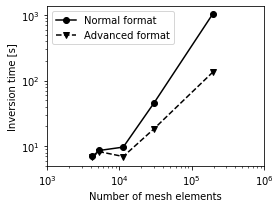

In [20]:
# graph
nelems = np.array(nelems)
fig, ax = plt.subplots(figsize=(4,3)) # TODO make smaller to have bigger labels
ax.loglog(nelems, timeNormal, 'ko-', label='Normal format')
ax.loglog(nelems, timeAdvanced, 'kv--', label='Advanced format')
ax.legend()
ax.set_xlabel('Number of mesh elements')
ax.set_ylabel('Inversion time [s]') # per iteration time??
ax.set_xlim([1e3, 1e6])
ax.set_ylim([5e0, None])
xticks = ax.get_xticks()
#ax.set_xticks(xticks)
#ax.set_xticklabels(['{:.0f}k'.format(a/1000) for a in xticks])
if not os.path.exists('../src/image/paper3d/'):#check directory exists 
    os.mkdir('../src/image/paper3d/')
fig.tight_layout()
fig.savefig('../src/image/paper3d/advanced-mesh-benchmark.jpg', dpi=600)

## Observations
- might be better to use iteration time rather than inversion time
- as it seems that number of iterations differ between normal and advanced mesh format